# Wrangle and Analyze Data

#### Requirements:
>Data wrangling, which consists of:
- Gathering data (downloadable file in the Resources tab in the left most panel of your classroom and linked in step 1 below).
- Assessing data
- Cleaning data

>Storing, analyzing, and visualizing your wrangled data
Reporting on 1) your data wrangling efforts and 2) your data analyses and visualizations
>

## Gather

In [618]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [619]:
## Load dataset 1: twitter-archive-enhanced
archive=pd.read_csv('twitter-archive-enhanced.csv')
archive.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [620]:
## Load dataset 2: image.predictions.tsv
image=pd.read_csv('image-predictions.tsv', sep="\t")
image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [621]:
## Load dataset 3: tweet-json
tweet=pd.read_json('tweet.json', lines=True)
tweet.head(3)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


## Assess

In [622]:
## Check the rows and columns

print("The shape of archive is {} rows and {} cloumns.".format(archive.shape[0], archive.shape[1]))
print("The shape of image is {} rows and {} cloumns.".format(image.shape[0], image.shape[1]))
print("The shape of tweet is {} rows and {} cloumns.".format(tweet.shape[0], tweet.shape[1]))

The shape of archive is 2356 rows and 17 cloumns.
The shape of image is 2075 rows and 12 cloumns.
The shape of tweet is 2354 rows and 31 cloumns.


### Archive

In [623]:
## Check the column name
archive.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [624]:
# Check the data type
archive.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [625]:
# Check missing value
archive.isnull().sum()
## It's ok if there are missing value about retweet and in_reply since it's very likely that this tweet doesn't have any
#retweet and reply.

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [626]:
# Check the data statistics
archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [627]:
#Check duplicated
archive[archive.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [628]:
archive.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
848,766069199026450432,NaN,NaN,2016-08-18 00:28:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Juno. She can see your future. 12/10 h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/766069199...,12,10,Juno,None,None,None,None
1738,679527802031484928,NaN,NaN,2015-12-23 05:03:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This little pupper just arrived. 11/10 would s...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679527802...,11,10,None,None,None,pupper,None
1162,723688335806480385,NaN,NaN,2016-04-23 01:41:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Reginald. He starts screaming at rando...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/723688335...,12,10,Reginald,None,None,None,None


Data issues in Archive:
1. All the item ends with _id should be string type. 
2. There are 59 null value in expanded_url. It's ok if there are missing value about retweet and in_reply since it's very likely that this tweet doesn't have any retweet and reply.
3. For rating_numerator and rating_denominator, there are some outlier.
4. These ratings almost always have a denominator of 10 so we need to deal with the value not equals to 10.
5. There are some oulier in the rating numerator; Also, rating numerator and denominator are seperated so we need to create a new column to calculate the rating.
6. There are a lot of None value in doggo, floofer, pupper and puppo and we should replace it with NaN.
7. In the name column, there are some name like a or None which should be processed.
8. data type for timestamp is wrong.

### Image

In [629]:
#Check the data type
image.dtypes

tweet_id      int64
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

In [630]:
# Check the missing value
image.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [631]:
# Check duplicated
image[image.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [632]:
# Check data statistics
image.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


1. tweet_id should be string.

## Tweet

In [633]:
tweet.sample(3)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
1151,2016-04-28 16:52:08+00:00,725729321944506368,725729321944506368,This is Lola. She's a Butternut Splishnsplash....,False,"[0, 114]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 725729306392027137, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,5646,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1286,2016-03-11 17:50:48+00:00,708349470027751425,708349470027751424,This is River. He's changing the trumpet game....,False,"[0, 107]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 708349462943498240, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,2568,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
812,2016-08-31 21:47:27+00:00,771102124360998913,771102124360998912,This is Charlie. He works for @TODAYshow. Supe...,False,"[0, 115]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 771102115905372160, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,6898,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [634]:
tweet_new=tweet[['created_at','id','source','lang','retweet_count','favorite_count']]

In [635]:
#Check data type
tweet_new.dtypes

created_at        datetime64[ns, UTC]
id                              int64
source                         object
lang                           object
retweet_count                   int64
favorite_count                  int64
dtype: object

In [636]:
#Check missing value
tweet_new.isnull().sum()

created_at        0
id                0
source            0
lang              0
retweet_count     0
favorite_count    0
dtype: int64

In [637]:
#Check data statistics
tweet_new.describe()

,id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


1. tweet_id and id is not consistent
2. The datatype of id is not correct

## Clean

### Archive

In [638]:
# Delete the column text:
archive.drop('text', axis=1, inplace=True)

In [639]:
# Change data types from int to string
archive[['tweet_id','in_reply_to_status_id','in_reply_to_user_id']]=archive[['tweet_id','in_reply_to_status_id','in_reply_to_user_id']].apply(lambda x: x.astype(str))

In [640]:
# Exclude outlier in rating nomintor
archive=archive.query('rating_numerator<=20')

In [641]:
# Check the data type
archive.dtypes

tweet_id                       object
in_reply_to_status_id          object
in_reply_to_user_id            object
timestamp                      object
source                         object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [642]:
# Replace None with Nan in name.
none_column=['name','doggo','floofer','pupper','puppo']
for i in non_column:
    archive[i]=archive[i].replace("None", "")

In [643]:
# Replace non with Nan in _id columns
archive.in_reply_to_status_id.replace('nan', np.nan, inplace=True)
archive.in_reply_to_user_id.replace('nan', np.nan, inplace=True)

In [644]:
# Change rating denominator to 10.
archive['rating_denominator']=10

In [645]:
archive.source.value_counts()
# There are 4 type of sources I need extract the text between > and </a>

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2198
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      10
Name: source, dtype: int64

In [646]:
# Extract the 4 value:
import re

def extract_type(string):
    result=re.sub('<.*?>','',string)
    return result

archive.source=archive.source.apply(lambda x: extract_type(x))

In [647]:
archive.source.value_counts()

Twitter for iPhone     2198
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                10
Name: source, dtype: int64

In [648]:
#Change data type of timestamp
archive.timestamp=pd.to_datetime(archive.timestamp)

In [649]:
## Combine different dog stages into one column:

# create a new column dog_stage
archive['dog_stage']=archive.doggo+archive.floofer+archive.pupper+archive.puppo
archive.dog_stage.value_counts()


                1953
pupper           244
doggo             83
puppo             29
doggopupper       12
floofer            9
doggopuppo         1
doggofloofer       1
Name: dog_stage, dtype: int64

In [650]:
# Deal with records with multiple stage and missing value
archive.loc[archive.dog_stage=='pupper','dog_stage']='Pupper'
archive.loc[archive.dog_stage=='doggo','dog_stage']='Doggo'
archive.loc[archive.dog_stage=='puppo','dog_stage']='Puppo'
archive.loc[archive.dog_stage=='doggopupper','dog_stage']='Doggo, Pupper'
archive.loc[archive.dog_stage=='floofer','dog_stage']='Floofer'
archive.loc[archive.dog_stage=='doggopuppo','dog_stage']='Doggo, Puppo'
archive.loc[archive.dog_stage=='doggofloofer','dog_stage']='Doggo, Floofer'

In [651]:
archive.loc[archive.dog_stage=='','dog_stage']=np.nan

In [652]:
archive.dog_stage=archive.dog_stage.fillna('Unknown')
archive.dog_stage.value_counts()

archive.drop(['doggo','floofer','pupper','puppo'],axis=1,inplace=True)

In [653]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2332 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2332 non-null   object             
 1   in_reply_to_status_id       73 non-null     object             
 2   in_reply_to_user_id         73 non-null     object             
 3   timestamp                   2332 non-null   datetime64[ns, UTC]
 4   source                      2332 non-null   object             
 5   retweeted_status_id         180 non-null    float64            
 6   retweeted_status_user_id    180 non-null    float64            
 7   retweeted_status_timestamp  180 non-null    object             
 8   expanded_urls               2277 non-null   object             
 9   rating_numerator            2332 non-null   int64              
 10  rating_denominator          2332 non-null   int64           

In [654]:
## Store clean dataset
archive.to_csv('archive_clean.csv')

### Image

In [655]:
## Change data type for id
image.tweet_id.astype(str)

0       666020888022790149
1       666029285002620928
2       666033412701032449
3       666044226329800704
4       666049248165822465
               ...        
2070    891327558926688256
2071    891689557279858688
2072    891815181378084864
2073    892177421306343426
2074    892420643555336193
Name: tweet_id, Length: 2075, dtype: object

In [656]:
# Store clean dataset
image.to_csv('image_clean.tsv')

### Tweet

In [657]:
tweet_new.columns

Index(['created_at', 'id', 'source', 'lang', 'retweet_count',
       'favorite_count'],
      dtype='object')

In [659]:
tweet_new.dtypes

created_at        datetime64[ns, UTC]
id                              int64
source                         object
lang                           object
retweet_count                   int64
favorite_count                  int64
dtype: object

In [661]:
# Change datatype for _id 
tweet_new['id'].astype(str)

0       892420643555336193
1       892177421306343426
2       891815181378084864
3       891689557279858688
4       891327558926688256
               ...        
2349    666049248165822465
2350    666044226329800704
2351    666033412701032449
2352    666029285002620928
2353    666020888022790149
Name: id, Length: 2354, dtype: object

In [662]:
tweet_new.head()

,created_at,id,source,lang,retweet_count,favorite_count
0,2017-08-01 16:23:56+00:00,892420643555336193,"<a href=""http://twitter.com/download/iphone"" r...",en,8853,39467
1,2017-08-01 00:17:27+00:00,892177421306343426,"<a href=""http://twitter.com/download/iphone"" r...",en,6514,33819
2,2017-07-31 00:18:03+00:00,891815181378084864,"<a href=""http://twitter.com/download/iphone"" r...",en,4328,25461
3,2017-07-30 15:58:51+00:00,891689557279858688,"<a href=""http://twitter.com/download/iphone"" r...",en,8964,42908
4,2017-07-29 16:00:24+00:00,891327558926688256,"<a href=""http://twitter.com/download/iphone"" r...",en,9774,41048


In [663]:
# Rename id to tweet_id
tweet_new.rename(columns={'id':'tweet_id'}, inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [664]:
tweet_new.head()

,created_at,tweet_id,source,lang,retweet_count,favorite_count
0,2017-08-01 16:23:56+00:00,892420643555336193,"<a href=""http://twitter.com/download/iphone"" r...",en,8853,39467
1,2017-08-01 00:17:27+00:00,892177421306343426,"<a href=""http://twitter.com/download/iphone"" r...",en,6514,33819
2,2017-07-31 00:18:03+00:00,891815181378084864,"<a href=""http://twitter.com/download/iphone"" r...",en,4328,25461
3,2017-07-30 15:58:51+00:00,891689557279858688,"<a href=""http://twitter.com/download/iphone"" r...",en,8964,42908
4,2017-07-29 16:00:24+00:00,891327558926688256,"<a href=""http://twitter.com/download/iphone"" r...",en,9774,41048


In [665]:
# Extract exact source from source column
tweet_new.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2219
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [666]:
def extract_type(string):
    result=re.sub("<.*?>", "", string)
    return result

tweet_new['source']=tweet_new['source'].apply(lambda x: extract_type(x))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [667]:
tweet_new.source.value_counts()

Twitter for iPhone     2219
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

In [668]:
tweet_new.to_json('tweet_new.json')

## Data visualization and Analysis

In [538]:
archive['rating']=archive.rating_numerator/archive.rating_denominator

Text(0.5, 1.0, 'Proportion of each source')

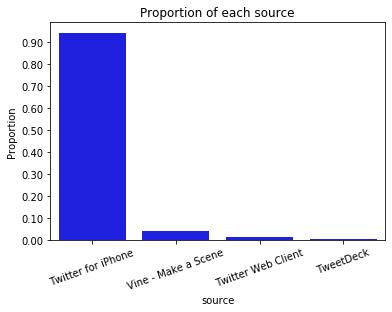

In [543]:
# Check the distribution of source
# sns.countplot(archive.source)
# plt.xticks(rotation=20)

n_points=archive.shape[0]
max_count=archive.source.value_counts().max()
max_prop=max_count/n_points

tick_prop=np.arange(0, max_prop, 0.1)
tick_names=['{:0.2f}'.format(v) for v in tick_prop]

# create the plot
sns.countplot(x='source', data=archive, color='blue',order=archive.source.value_counts().index)
plt.yticks(tick_prop*n_points, tick_names)
plt.ylabel('Proportion')
plt.xticks(rotation=20)
plt.title('Proportion of each source')

In this image, we can conclude that the most important source is Twitter for iPhone, it accounts for more than 90% percent.

Text(0.5, 1.0, 'Rating numerator count')

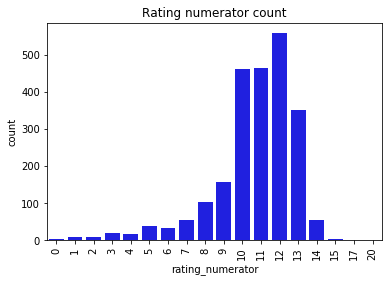

In [540]:
sns.countplot(archive.rating_numerator, color='blue')
plt.xticks(rotation=90)
plt.title("Rating numerator count")

In this image, we can see that the most data point of the rating numerator are between 10~13. Also, we can see some outlier that is not very useful in the further analysis, so I removed them.

(array([1.100e+01, 2.800e+01, 8.600e+01, 5.500e+01, 2.600e+02, 1.483e+03,
        4.050e+02, 2.000e+00, 1.000e+00, 1.000e+00]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

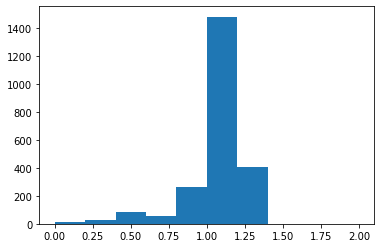

In [539]:
# Check the histgram of rating except outlier which is rating>10
plt.hist(archive.rating)

In this image, we can see that most of the rating is between 0.5~1.5.

In [565]:
# Check the popular name for dogs
archive.name.value_counts()
# There are 729 missing value and 54 a which are meaningless

a            54
Charlie      12
Lucy         11
Oliver       11
Cooper       11
             ..
Pawnd         1
by            1
Ralf          1
Andy          1
Sojourner     1
Name: name, Length: 953, dtype: int64

In [566]:
archive.name.replace("",np.nan, inplace=True)
archive.name.replace("a",np.nan, inplace=True)

In [570]:
# Find the top 10 popular name for dogs
archive.name.value_counts().loc[lambda x: x>=10]

Charlie    12
Oliver     11
Cooper     11
Lucy       11
Tucker     10
Penny      10
Lola       10
Name: name, dtype: int64

Charlie, Oliver, Cooper and Lucy are common dog names.

In [684]:
# Check how many breeds that the neural network can predict
image.p1.value_counts()

golden_retriever       150
Labrador_retriever     100
Pembroke                89
Chihuahua               83
pug                     57
                      ... 
fire_engine              1
three-toed_sloth         1
handkerchief             1
ocarina                  1
African_hunting_dog      1
Name: p1, Length: 378, dtype: int64

Here, we can see that the most common breeds found by the neural network are golden retriever, Labrador retriever and Pembroke(Corgi).

In [672]:
# Find the tweet which get the most retweet and the tweet which get the most favorite
tweet_new[tweet_new.retweet_count==tweet_new.retweet_count.max()]

,created_at,tweet_id,source,lang,retweet_count,favorite_count
1037,2016-06-18 18:26:18+00:00,744234799360020481,Twitter for iPhone,en,79515,131075


In [673]:
tweet_new[tweet_new.favorite_count==tweet_new.favorite_count.max()]

,created_at,tweet_id,source,lang,retweet_count,favorite_count
412,2017-01-21 18:26:02+00:00,822872901745569793,Twitter for iPhone,en,48265,132810


tweet_id:744234799360020481 received the most retweet, the number of retweet is 79515; tweet_id:822872901745569793 received the most favourite, the number of favourite is 132810; The highest favourite count is almost twice as many as the highest retweet, which may imply that click favourite button is a more common way to show the “like”.